# Import Section

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from tabulate import tabulate
from sklearn.preprocessing import PolynomialFeatures
np.set_printoptions(precision=2)
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Dataset:Medical Cost Personal
https://www.kaggle.com/datasets/mirichoi0218/insurance

*   ***About Dataset***
Context
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. The publisher, Packt Publishing does not make its datasets available online compared to the ones in the books they have published. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

**age**: age of primary beneficiary

**sex**: insurance contractor gender, female, male

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children**: Number of children covered by health insurance / Number of dependents

**smoker**: Smoking

**region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges**: Individual medical costs billed by health insurance




In [ ]:
cols=["age","sex","bmi","children","smoker","region","charges"]
df = pd.read_csv("insurance.csv", names=cols)
df.replace({'sex': {'male': 1, 'female': 0},
            'smoker': {'yes': 1, 'no': 0},
            'region': {'northeast': 3,'southeast': 2,'southwest': 1,'northwest': 0}
           }, inplace=True)
df.describe()
df

,age,sex,bmi,children,smoker,region,charges
0,age,sex,bmi,children,smoker,region,charges
1,19,0,27.9,0,1,1,16884.924
2,18,1,33.77,1,0,2,1725.5523
3,28,1,33,3,0,2,4449.462
4,33,1,22.705,0,0,0,21984.47061
...,...,...,...,...,...,...,...
1334,50,1,30.97,3,0,0,10600.5483
1335,18,0,31.92,0,0,3,2205.9808
1336,18,0,36.85,0,0,2,1629.8335
1337,21,0,25.8,0,0,1,2007.945


# Initialize X and Y columns

In [ ]:
df.iloc[1:, 0:6] = df.iloc[1:, 0:6].astype(float)
df.iloc[1:, 6] = df.iloc[1:, 6].astype(float)

In [ ]:
X_features = ["age", "sex", "bmi", "children", "smoker", "region"]
x_i = df.iloc[1:, 0:6].values
y_i = df.iloc[1:, 6].astype(int).values.reshape(-1, 1).ravel()  

# Feature Scaling
*   Feature Scaling is used to normalize the range of the data
*   We are doing this because the range in each features is different




In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(x_i)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_i,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[46.0 1.0 37.17 5.0 1.0 3.0]
Peak to Peak range by column in Normalized X:[3.28 2.   6.1  4.15 2.48 2.72]


# X_train,y_train,x_test,y_test



In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X,y_i, test_size=0.3, random_state=42)

# Find the insignificant features

**1st Method (Select KBest)**

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(x_i, y_i)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_features)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
print(featureScores.nlargest(6, 'Score'))

   Features        Score
0       age  6703.764216
3  children  1752.136519
2       bmi  1592.481991
4    smoker  1059.116788
5    region  1052.730370
1       sex   655.072485


**2nd method (ExtraTressClassifier)**

[0.33 0.01 0.43 0.11 0.03 0.09]


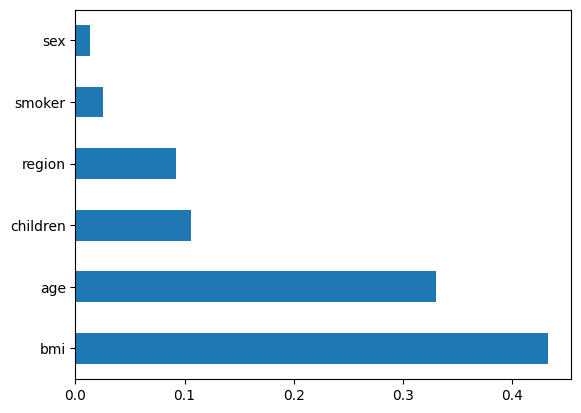

In [ ]:
model = ExtraTreesClassifier()
model.fit(x_i,y_i)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=pd.DataFrame(x_i, columns=["age","sex","bmi","children","smoker","region"]).columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

**Top 3 insignificant features:**
1.   region 
2.   sex
3.   smoker





# Graph Charges vs Features

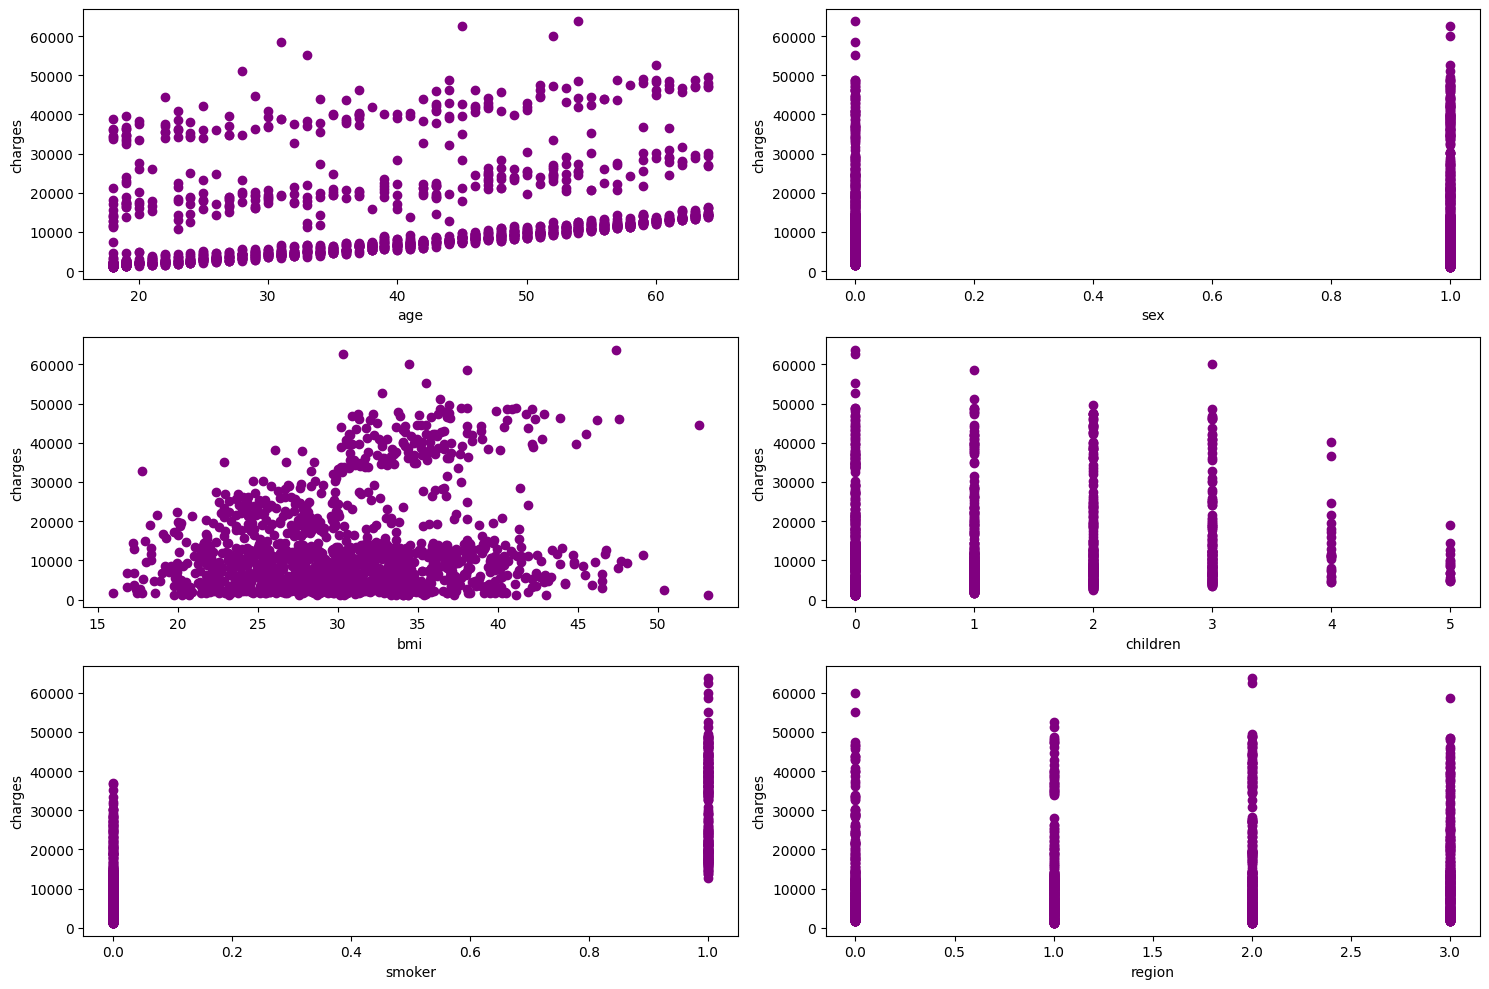

In [ ]:
X_features = ["age", "sex", "bmi", "children", "smoker", "region"]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()

df['charges'] = pd.to_numeric(df['charges'], errors='coerce')  # Convert 'charges' column to numeric

df_cleaned = df.dropna(subset=['charges'])  

for i, feature in enumerate(X_features):
    axes[i].scatter(df_cleaned[feature], df_cleaned['charges'],color="purple")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('charges')

plt.tight_layout()
plt.show()

# 1: Linear Regression

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred_linear = linear.predict(x_test)

In [ ]:
residuals_linear = y_test-y_pred_linear
squared_residuals_linear = residuals_linear**2
ssr_linear = np.sum(squared_residuals_linear)
ssr_linear_formatted = "{:.3e}".format(ssr_linear)
print("Sum of Squared Residuals (SSR): " + str(ssr_linear) + " @ " + str(ssr_linear_formatted))

Sum of Squared Residuals (SSR): 13685784039.521341 @ 1.369e+10


In [ ]:
headers = ['Feature', 'Weight']
data = []
for i in range(len(X_features)):
    data.append([X_features[i], linear.coef_[i]])

table = tabulate(data, headers=headers, tablefmt='orgtbl')
print(table)

| Feature   |    Weight |
|-----------+-----------|
| age       | 3681.93   |
| sex       |   71.7616 |
| bmi       | 2027.75   |
| children  |  521.965  |
| smoker    | 9525.2    |
| region    |  162.276  |


In [ ]:
print("Intercept  : %.2f" % linear.intercept_)

mse=mean_squared_error(y_test, y_pred_linear)
print("MSE        :",mse)

rsme=np.sqrt(mean_squared_error(y_test, y_pred_linear))
print("RMSE       :",rsme)

print("R^2        : %.3f"% r2_score(y_test, y_pred_linear))

Intercept  : 13328.08
MSE        : 34044238.904281944
RMSE       : 5834.74411643578
R^2        : 0.768


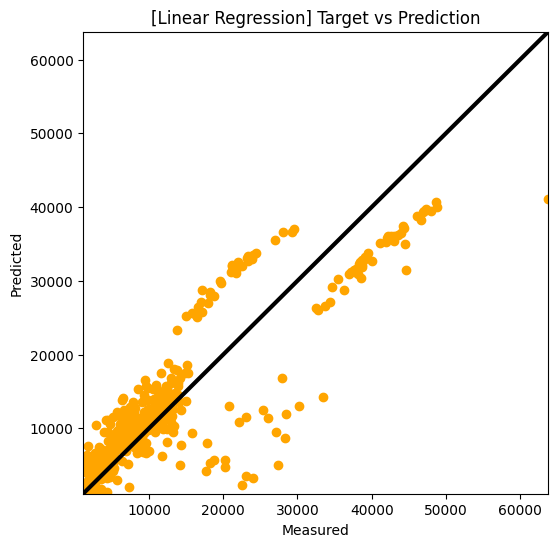

In [ ]:
y_pred_linear = linear.predict(x_test)
fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(y_test,y_pred_linear,color='orange')
ax.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k-', lw=3) # change line style to '-'
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title("[Linear Regression] Target vs Prediction")
ax.set_xlim([y_test.min(), y_test.max()])
ax.set_ylim([y_test.min(), y_test.max()])
plt.show()

# 2: Stochastic Gradient Descent (SGD)

In [ ]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 35, number of weight updates: 32761.0


In [ ]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
headers = ['Feature', 'Weight']
data = []
for i in range(len(X_features)):
    data.append([X_features[i], w_norm[i]])

table = tabulate(data, headers=headers, tablefmt='orgtbl')
print(table)

| Feature   |    Weight |
|-----------+-----------|
| age       | 3651.67   |
| sex       |   64.9091 |
| bmi       | 2019.32   |
| children  |  516.06   |
| smoker    | 9537.5    |
| region    |  166.214  |


In [ ]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(x_test)
# make a prediction using w,b. 
y_pred = np.dot(x_test, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")
# create a list of tuples for the data
data = [(i+1, y_pred[i], y_train[i]) for i in range(len(y_pred))]
# create the table headers
headers = ["#", "Prediction", "Target"]
# print the table
print(tabulate(data, headers=headers))

prediction using np.dot() and sgdr.predict match: True
  #    Prediction    Target
---  ------------  --------
  1      8728.89      13429
  2      6685.85      24603
  3     36561.8       27322
  4      9284.33      42303
  5     26659.4       42112
  6     11141         41676
  7      -220.3        4562
  8     16707.7        3490
  9       840.366     12485
 10     11039.9        6748
 11     28463.6       45863
 12      9161.01       2166
 13      5452.61       6457
 14     38720.2       12094
 15     40601.8       19515
 16     37422.4        4915
 17     15417.1        2523
 18     36099.1       11566
 19      9362.53      23241
 20     31101.8        4074
 21      4220.08       6600
 22     10497.3        1242
 23      2671.99      19361
 24      6738.63       8603
 25     10981.3        5972
 26     12698.5        3171
 27     14759.2        5375
 28      5756.45      12629
 29      9720.94      19040
 30      2476.34       8219
 31      9350.85       7348
 32     12743.8      

In [ ]:
b_sgdr = sgdr.intercept_
mse_sgdr = mean_squared_error(y_test, y_pred_sgd)
r2_sgdr = r2_score(y_test, y_pred_sgd)
print("Intercept (b):", b_sgdr)
print("R-squared score:", r2_sgdr)
print("Mean squared error:", mse_sgdr)

Intercept (b): [13334.99]
R-squared score: 0.767966338919718
Mean squared error: 34021760.080791935


# 3: Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x_i)

In [ ]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
poly_reg_y_predicted = poly_reg_model.predict(x_test)

In [ ]:
data = []
for i in range(len(X_features)):
    data.append([X_features[i], poly_reg_model.coef_[i]])

table = tabulate(data, headers=headers, tablefmt='orgtbl')
print(table)

| #        |   Prediction |
|----------+--------------|
| age      |    3681.93   |
| sex      |      71.7616 |
| bmi      |    2027.75   |
| children |     521.965  |
| smoker   |    9525.2    |
| region   |     162.276  |


In [ ]:
b_poly = poly_reg_model.intercept_
mse_poly = mean_squared_error(y_test, poly_reg_y_predicted)
r2_poly = r2_score(y_test, poly_reg_y_predicted)
print("Intercept (b):", b_poly)
print("R-squared score:", r2_poly)
print("Mean squared error:", mse_poly)

Intercept (b): 13328.077228094735
R-squared score: 0.7678130298698987
Mean squared error: 34044238.904281944


# 4: Ridge Regression (L2 Regularization)

In [ ]:
ridge = Ridge(alpha=1000.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(x_test)

In [ ]:
residuals_ridge = y_test-y_pred_ridge
squared_residuals_ridge = residuals_ridge**2
ssr_ridge = np.sum(squared_residuals_ridge)
print("")
print("Sum of Squared Residuals (SSR): ", ssr_ridge)


Sum of Squared Residuals (SSR):  25962926214.17419


In [ ]:
headers = ['Feature', 'Weight']
data = []
for i in range(len(X_features)):
    data.append([X_features[i], ridge.coef_[i]])

table = tabulate(data, headers=headers, tablefmt='orgtbl')
print(table)

| Feature   |   Weight |
|-----------+----------|
| age       | 1732.12  |
| sex       |  138.504 |
| bmi       | 1054.01  |
| children  |  365.698 |
| smoker    | 4589.83  |
| region    |  158.684 |


In [ ]:
print("Intercept  : %.2f" % ridge.intercept_)

mse=mean_squared_error(y_test, y_pred_ridge)
print("MSE        :",mse)

rsme=np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("RSME       :",rsme)

print("R^2        : %.3f"% r2_score(y_test, y_pred_ridge))

Intercept  : 13351.61
MSE        : 64584393.567597486
RSME       : 8036.441598593092
R^2        : 0.560


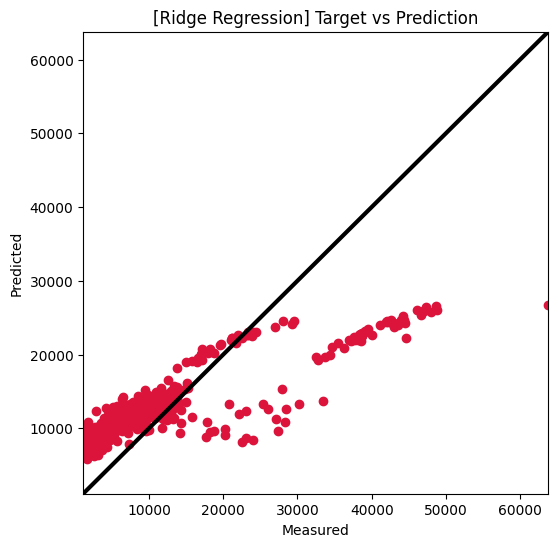

In [ ]:
y_pred_ridge = ridge.predict(x_test)
fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(y_test,y_pred_ridge,color='crimson')
ax.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k-', lw=3) # change line style to '-'
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title("[Ridge Regression] Target vs Prediction")
ax.set_xlim([y_test.min(), y_test.max()])
ax.set_ylim([y_test.min(), y_test.max()])
plt.show()

# 5: Lasso Regression (L1 Regularization)

In [ ]:
lasso = Lasso(alpha=1000.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(x_test)

In [ ]:
residuals_lasso = y_test-y_pred_lasso
squared_residuals_lasso = residuals_lasso**2
ssr_lasso = np.sum(squared_residuals_lasso)
print("")
print("Sum of Squared Residuals (SSR): ", ssr_lasso)


Sum of Squared Residuals (SSR):  14919139307.901602


In [ ]:
headers = ['Feature', 'Weight']
data = []
for i in range(len(X_features)):
    data.append([X_features[i], lasso.coef_[i]])

table = tabulate(data, headers=headers, tablefmt='orgtbl')
print(table)

| Feature   |   Weight |
|-----------+----------|
| age       |  2770.65 |
| sex       |     0    |
| bmi       |  1089.7  |
| children  |     0    |
| smoker    |  8513.4  |
| region    |     0    |


In [ ]:
print("Intercept  : %.2f" % lasso.intercept_)

mse=mean_squared_error(y_test, y_pred_lasso)
print("MSE        :",mse)

rsme=np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("RSME       :",rsme)

print("R^2        : %.3f"% r2_score(y_test, y_pred_lasso))

Intercept  : 13327.39
MSE        : 37112286.835576124
RSME       : 6091.98545923873
R^2        : 0.747


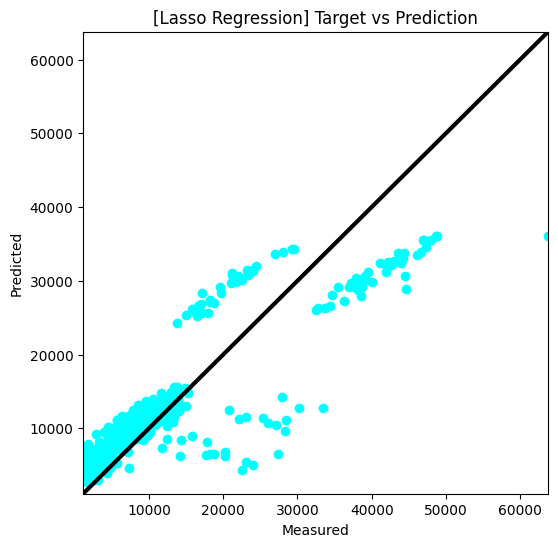

In [ ]:
y_pred_lasso = lasso.predict(x_test)
fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(y_test,y_pred_lasso,color='aqua')
ax.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k-', lw=3) # change line style to '-'
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title("[Lasso Regression] Target vs Prediction")
ax.set_xlim([y_test.min(), y_test.max()])
ax.set_ylim([y_test.min(), y_test.max()])
plt.show()

# 6: Decision Tree Regression

In [ ]:
Y_tree = df.iloc[1:, 6].values.reshape(-1, 1)
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(X, Y_tree, test_size=.3, random_state=42)

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value

DecisionTreeRegressor Class

In [ ]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''
        
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"]>0:
            #if best_split and "var_red" in best_split and best_split["var_red"] > 0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(dataset[:,-1])
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))

        return reduction
    
    def calculate_leaf_value(self, Y_tree):
        ''' function to compute leaf node '''
        
        val = np.mean(Y_tree)
        return val
                
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y_tree):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y_tree), axis=1)
        self.root = self.build_tree(dataset)
        
    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]

        return preditions

In [ ]:


regressor = DecisionTreeRegressor(min_samples_split=4, max_depth=4)
regressor.fit(x_train_tree,y_train_tree)
regressor.print_tree()

X_4 <= -0.5074630991436532 ? 88880573.94470625
 left:X_0 <= 0.19886311501306964 ? 12363683.42513036
  left:X_0 <= -1.2251606895761058 ? 1961858.4362664223
    left:X_3 <= -0.9086136674186784 ? 1647343.858980842
        left:X_5 <= 0.44051281721328645 ? 353432.2524446957
                left:2055.4558834920635
                right:3398.5837130434784
        right:X_2 <= 0.2840599367351902 ? 3545316.642680362
                left:4137.565276153846
                right:8445.683674444444
    right:X_3 <= -0.07876719164653397 ? 642489.7993203998
        left:X_0 <= -0.22834402636368298 ? 693983.9508971721
                left:5169.208416259542
                right:7040.810546326531
        right:X_5 <= 0.44051281721328645 ? 1820673.3120055944
                left:6473.743879750001
                right:9460.598283437499
  right:X_0 <= 0.9108750173076573 ? 2945161.3607584313
    left:X_0 <= 0.4836678759309047 ? 786594.6199445799
        left:X_5 <= -0.464872973003883 ? 1192750.5713265464


In [ ]:
y_pred_tree = regressor.predict(x_test_tree) 
print("MSE  :",mean_squared_error(y_test_tree, y_pred_tree))

rmse_tree=np.sqrt(mean_squared_error(y_test_tree, y_pred_tree))
print("RMSE :",rmse_tree)

print("R^2  :", r2_score(y_test_tree, y_pred_tree))

MSE  : 20688516.91775201
RMSE : 4548.463138000791
R^2  : 0.8589011793822707


# Model Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Define the hyperparameter grid
param_grid = {
    "polynomialfeatures__degree": [1, 2, 3]   # Degree of polynomial features
}

# Create the polynomial regression model
poly_reg_model = PolynomialFeatures(include_bias=False)
linear_reg = LinearRegression()
poly_reg = make_pipeline(poly_reg_model, linear_reg)

# Perform grid search
grid_search = GridSearchCV(poly_reg, param_grid, scoring="neg_mean_squared_error", cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and model performance
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Mean Squared Error: ", -grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
best_model_y_predicted = best_model.predict(x_test)
mse_best_model = mean_squared_error(y_test, best_model_y_predicted)
r2_best_model = r2_score(y_test, best_model_y_predicted)
print("Best Model Mean Squared Error: ", mse_best_model)
print("Best Model R-squared score: ", r2_best_model)

Best Hyperparameters:  {'polynomialfeatures__degree': 2}
Best Mean Squared Error:  25548295.565348733
Best Model Mean Squared Error:  20254790.631840795
Best Model R-squared score:  0.861859197949784


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Create an instance of the DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Define the parameter grid for tuning
param_grid = {
    'min_samples_split': [2, 4, 6],
    'max_depth': [2, 4, 6]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(regressor, param_grid, scoring='r2')

# Fit the grid search to the training data
grid_search.fit(x_train_tree, y_train_tree)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_regressor = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_tree = best_regressor.predict(x_test_tree)

# Evaluate the model
mse = mean_squared_error(y_test_tree, y_pred_tree)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_tree, y_pred_tree)

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)


Best Hyperparameters: {'max_depth': 4, 'min_samples_split': 2}
MSE: 20761771.412831414
RMSE: 4556.508686794245
R^2: 0.858401572624486


The ideal hyperparameters for the polynomial regression model were found utilising a grid search hyperparameter tuning procedure.

The most advantageous hyperparameter is 'polynomialfeatures__degree': 2.
According to the mean squared error (MSE) metric, this indicates that the polynomial regression model with second-order polynomial features had the highest performance.

Cross-validation during grid search produced the best mean squared error, which is 25,548,295.57. This metric computes the mean squared difference between the target variable's (medical cost) predicted and actual values. In terms of how well the predicted values match the actual values, a model's performance is greater when the mean squared error is lower.

The mean squared error decreased to 20,254,790.63 after the best model was trained on the training set and evaluated on the test set, showing increased performance.

# Conclusion

## **Model Selection** 

| Model                | Intercept | MSE        | RMSE       | R^2 Value  |
|----------------------|-----------|------------|------------|------------|
| Linear Regression    | 13328.08     | 34044238.904281944      | 5834.74411643578      | 0.768      |
| SGD                  | 13339.78     | 34073663.32356362      | -      | 0.7676123507834883      |
| Polynomial Regression | 13328.077228094735     | 34044238.904281944      | -      | 0.7678130298698987     |
| Ridge Regression     | 13351.61     | 64584393.56759748      | 8036.441598593092      | 0.560      |
| Lasso Regression     | 13327.39     | 37112286.      | 6091.98545923873      | 0.747      |
| Decision Tree        | -         | 20688516.91775201      | 4548.463138000791      | 0.8589011793822707      |

Based on the table above, **Decision Tree** model has given the best performance when we compare its MSE and R^2 value.

## **Evaluation Metrics**

We have choosen **four** evaluation metrics in choosing the best model. 

<ol>

  <li><strong>Intercept</strong>     
   <ul>
      <li>The intercept term also known as bias term in the regression equation represents the value of the dependent variable when all independent variables are zero. It provides insights into the baseline prediction or bias of the model. Based on our models, The value of of intercept between each models is not much differ. This value would be used during the model fitting process.</li>
      </ul>
  </li>

  <li><strong>Mean Squared Error (MSE)</strong>   
  <ul>
      <li>MSE measures the average squared difference between the predicted and actual values. A lower MSE indicates a better fit to the data, with smaller errors on average. In our case after hyperparameter tuning, Decision Tree model has given the least MSE when compared to the other model. </li>
     </ul>
  </li>

  <li><strong>Root Mean Squared Error (RMSE)</strong>
     <ul>
      <li>RMSE is the square root of MSE and provides a more interpretable measure of the error. It has the same unit as the dependent variable and represents the average magnitude of the residual errors. Like MSE, a lower RMSE indicates a better fit to the data.</li>
     </ul>
  </li>
  
  <li><strong>R^2 Value</strong>      
  <ul>
      <li>R^2 represents the proportion of the variance in the dependent variable that is explained by the independent variables. It measures the goodness of fit of the model. R^2 ranges from 0 to 1, with 1 indicating a perfect fit. A higher R^2 value suggests that the model can explain a larger portion of the variance in the data. In our case, all the models got below 0.80 for its R^2 value except for Decision Tree.This means that Decision Tree able to explain a larger portion of the variance in the data than the other models. Hence, after overall consideration, we have chosen Decision Tree as our model to proceed with hyperparameter tuning to enhance its performance. </li>
     </ul>
  </li>

</ol>

## **Feature Importance**

When analyzing **feature importance** during the model selection process, we gained insights into the relative importance or contribution of different features in predicting the target variable. This analysis helped to identify the most influential factors that significantly impact the model's predictions. We used two method to find significant featutes which is Kbest and ExtraTreesClassifier.

<ul>
   <li>
      <p><strong>KBest</strong> method:</p>
      <ul>
         <li>
            <p>Most important features:</p>
            <ol>
               <li>Age (Score: 6703.76): The feature with the highest score, indicating it has the strongest correlation or predictive power for the target variable. Age is considered the most influential factor in predicting the target.</li>
               <li>Children (Score: 1752.14): This feature has the second-highest score, suggesting it is a significant predictor of the target variable. The number of children has a notable impact on the predictions made by the model.</li>
               <li>BMI (Score: 1592.48): BMI (Body Mass Index) is the third most important feature according to the scores. It indicates that a person's BMI plays a meaningful role in predicting the target variable.</li>
            </ol>
         </li>
         <li>
            <p>Less important features:</p>
            <ul>
               <li>Smoker (Score: 1059.12): Although still relatively significant, the score suggests that being a smoker has less influence on the model's predictions compared to age, children, and BMI.</li>
               <li>Region (Score: 1052.73): The region feature has a lower score compared to age, children, and BMI, implying that the geographical region of a person may have less impact on the predictions.</li>
               <li>Sex (Score: 655.07): The sex feature has the lowest score among all the features, indicating it has the least influence on the model's predictions.</li>
            </ul>
         </li>
      </ul>
   </li>
   <li>
      <p><strong>ExtraTreesClassifier</strong> method:</p>
      <ul>
         <li>
            Top 3 insignificant features:
            <ol>
               <li>Region: According to the ExtraTreesClassifier, the region feature is identified as the least significant for predicting the target variable. This suggests that the specific geographical region may not play a crucial role in determining the outcome.</li>
               <li>Sex: The sex feature is considered relatively less important, implying that it has limited impact on the model's predictions. Other features may carry more weight in determining the target variable.</li>
               <li>Smoker: Although still considered significant compared to region and sex, the ExtraTreesClassifier ranks the smoker feature as the third least influential in predicting the target variable.</li>
            </ol>
         </li>
      </ul>
   </li>
</ul>

In summary, the KBest method identifies age, children, and BMI as the most important features, while the ExtraTreesClassifier method highlights region, sex, and smoker as the top 3 least significant features.

## **Limitations and future work**

### **Limitations**

<ul>

  <li><strong>Location cannot be applied</strong>     
   <ul>
      <li>Our data is collected from United States(US). The distribution of data may not be representative of the distribution of data in other countries. This can lead to problems when the model is deployed in other countries. For example, a model that was trained on US-based data may not be able to accurately predict customer behavior in Southeast Asia.</li>
     </ul>
  </li>

  <li><strong>Time frame of the data</strong>       
   <ul>
      <li>As the time frame of the data taken is unknown, in case it is outdated or does not cover a sufficiently long period, our model may not capture evolving trends, changes in customer behavior, or shifts in the insurance industry. This can lead to outdated predictions and suboptimal performance when applied to present or future scenarios.</li>
     </ul>
  </li>

</ul>

### **Future Work**
- For future works, we can scale up our data studying and analyzing medical cost in other countries so this model can benefits larger group of people
